# Airline Delay Prediction Using Machine Learning

In [ ]:
!pip install keras

In [3]:
!pip install tensorflow

## import required library

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras

## Load The Data set

In [9]:
df=pd.read_csv('C://Users//sahoo//Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [11]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [15]:
df.count()

id             539383
Airline        539383
Flight         539383
AirportFrom    539383
AirportTo      539383
DayOfWeek      539383
Time           539383
Length         539383
Delay          539383
dtype: int64

In [17]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [19]:
df.isnull()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [23]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\4053343116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)
C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\4053343116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)
C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\4053343116.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Delay', palette='Set2', data = df)


<Axes: xlabel='Delay', ylabel='count'>

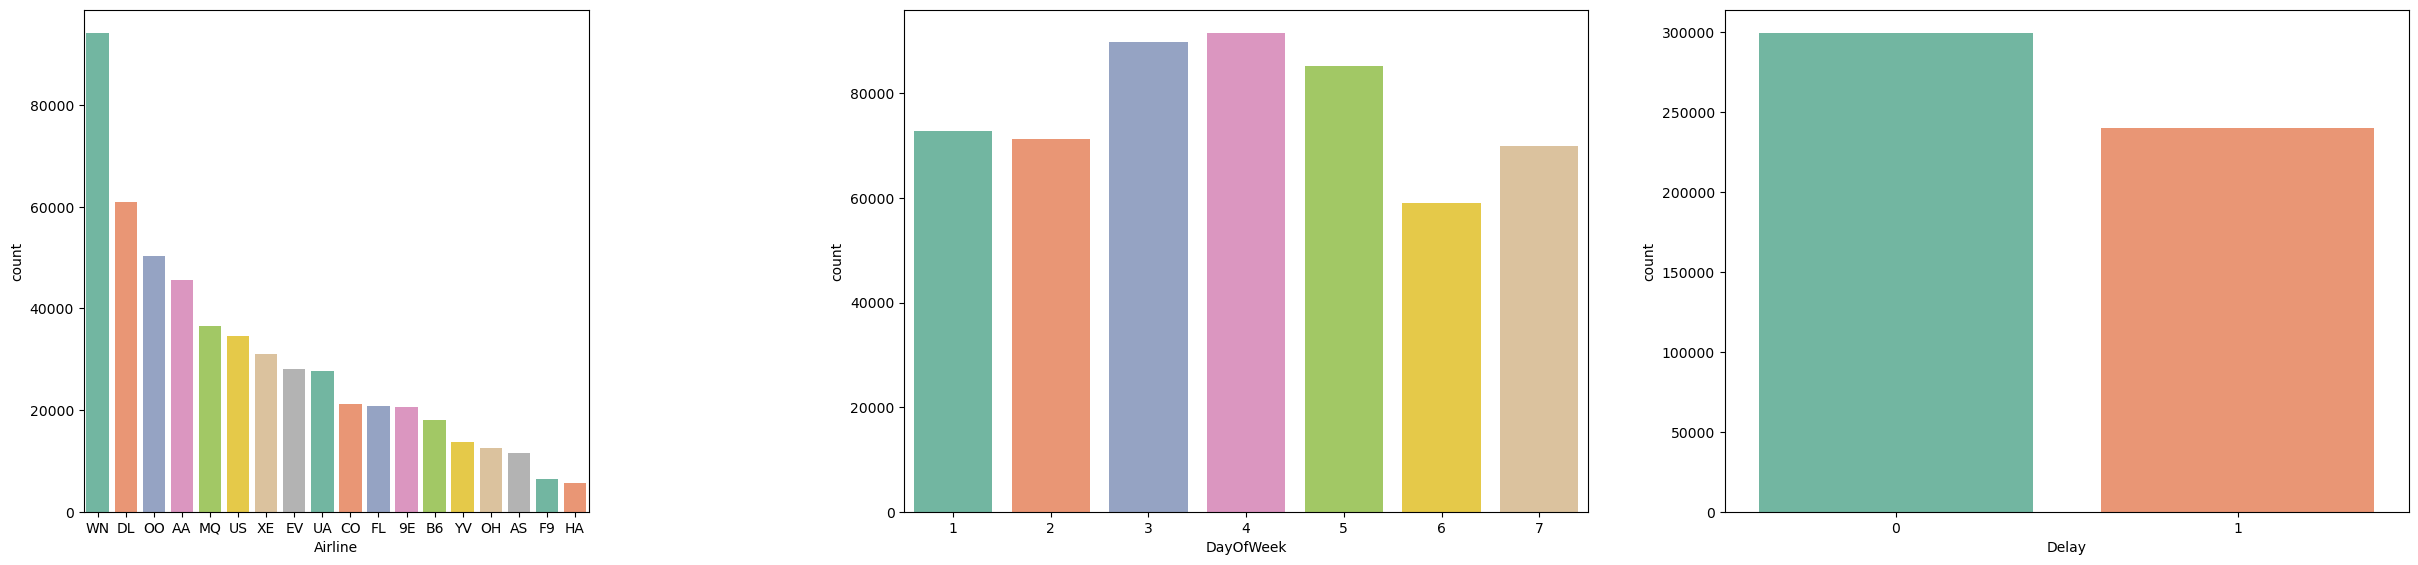

In [25]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)

plt.subplot(4,3,2)
sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)

plt.subplot(4,3,3)
sns.countplot(x = 'Delay', palette='Set2', data = df)

C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\1267738161.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Time, kde = False)
C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\1267738161.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Length, kde = False)


<Axes: xlabel='Length'>

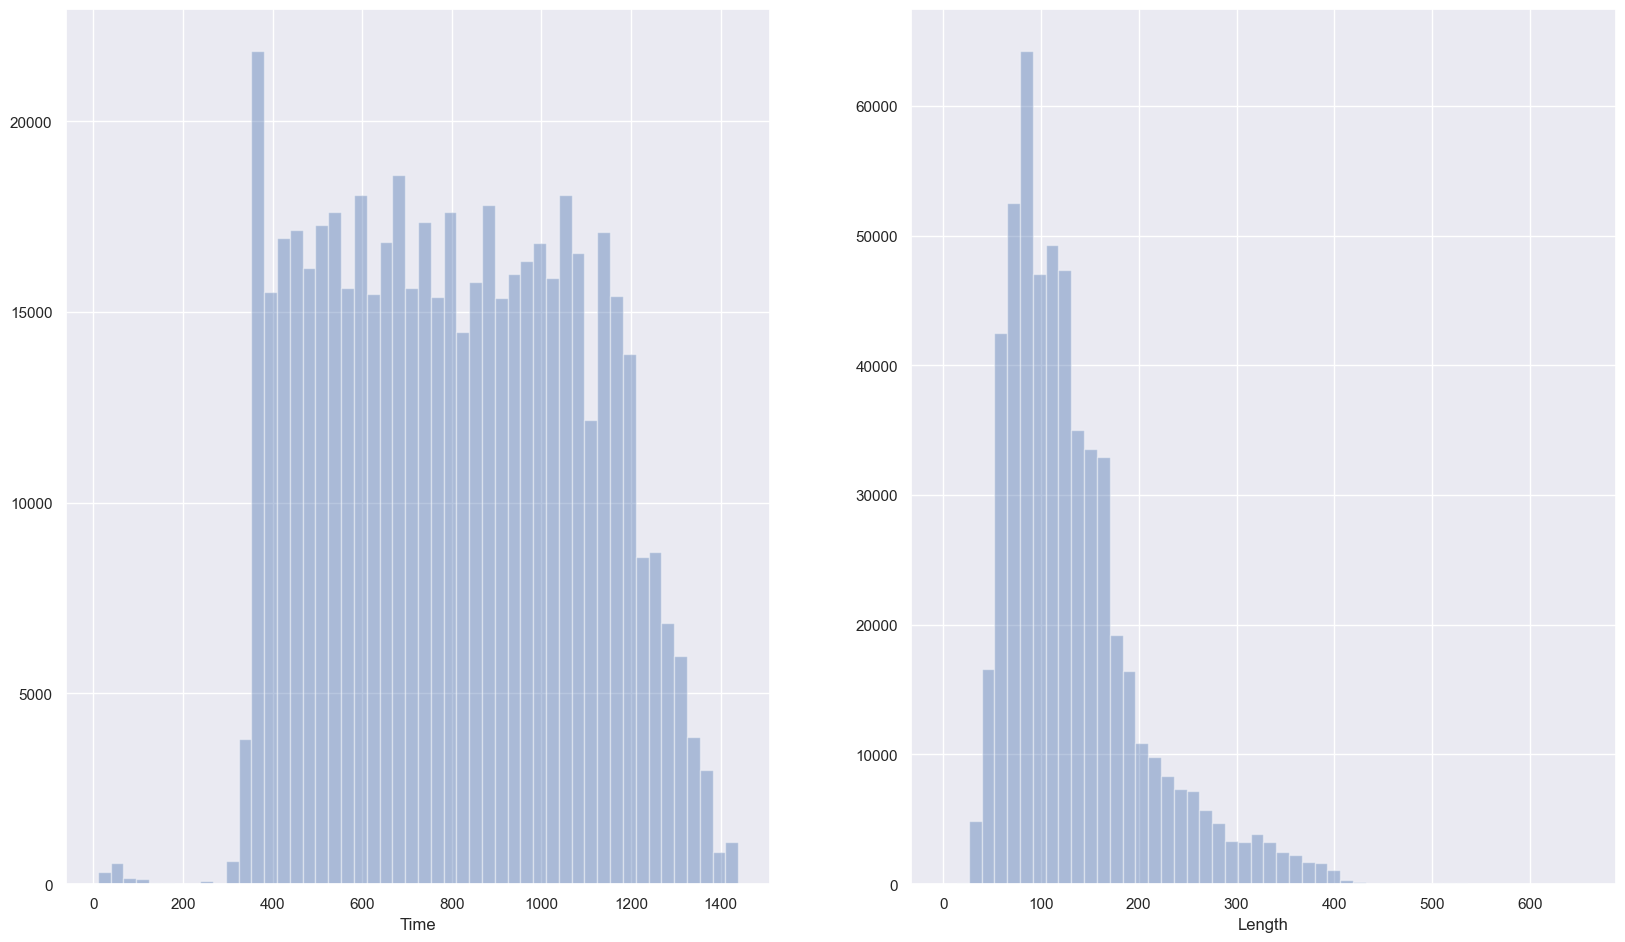

In [27]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df.Time, kde = False)

plt.subplot(2,2,2)
sns.distplot(df.Length, kde = False)

<Axes: xlabel='DayOfWeek', ylabel='count'>

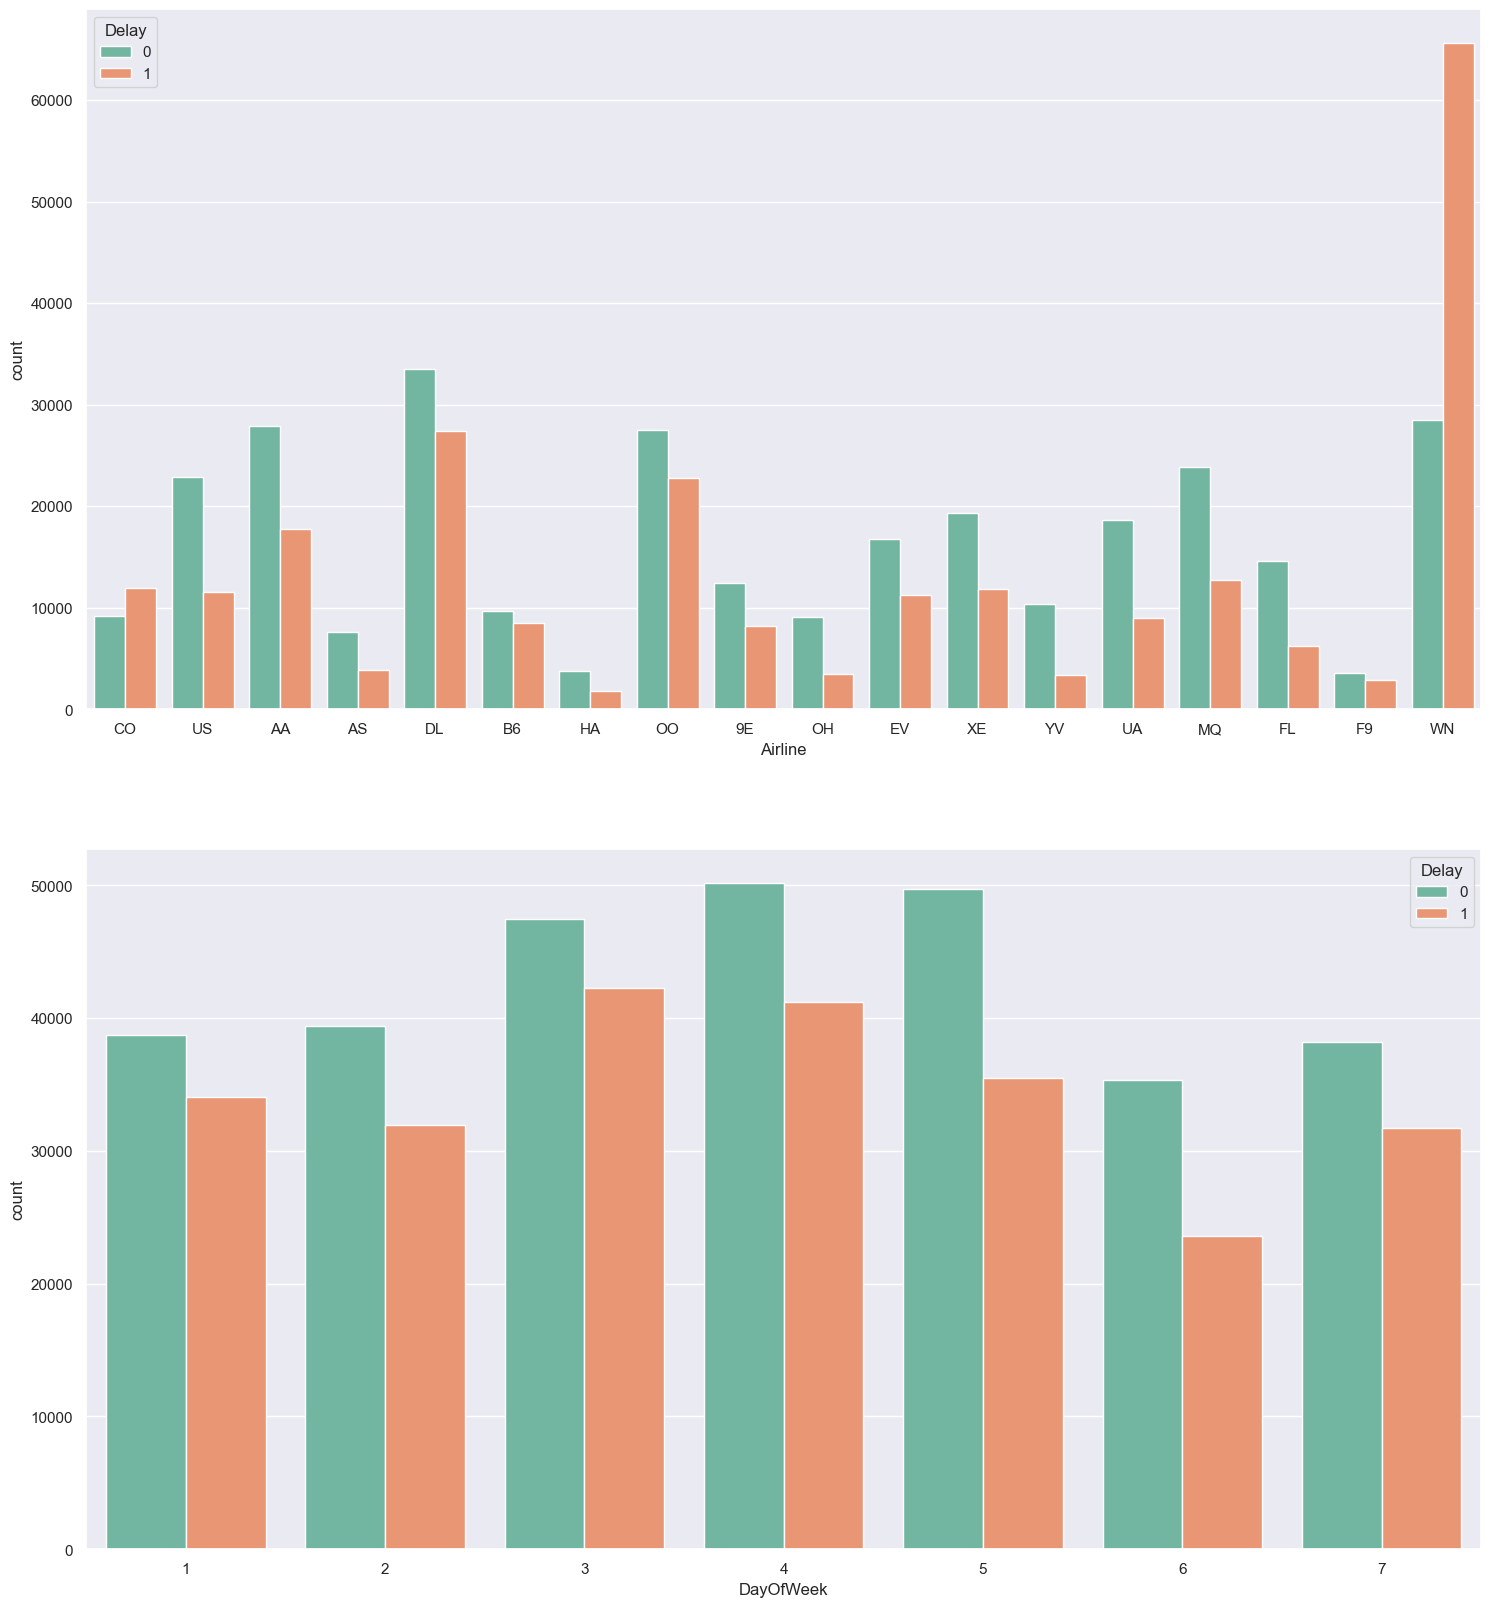

In [29]:
plt.figure(figsize = (18,20))

plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Delay', palette='Set2', data = df)

plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='Set2', data = df)

C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\120358640.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Delay", y = "Time", palette = "Set2", data = df)


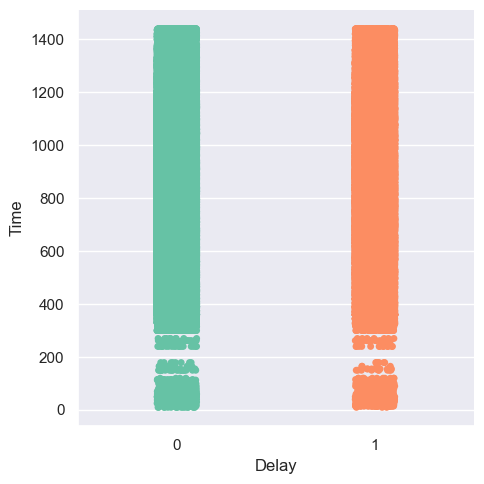

In [31]:
sns.catplot(x = "Delay", y = "Time", palette = "Set2", data = df)

C:\Users\sahoo\AppData\Local\Temp\ipykernel_13008\2076919715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Delay", y = "Length", palette = "Set2", data = df)


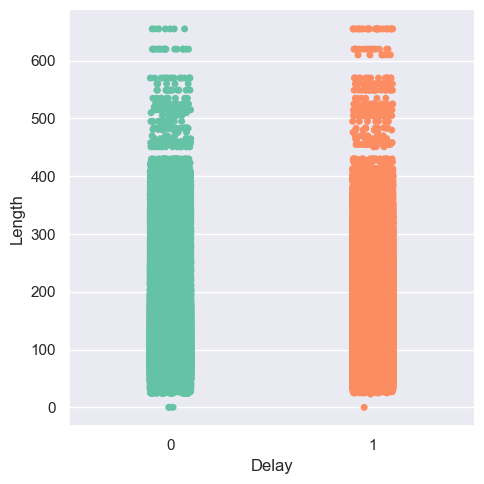

In [33]:
sns.catplot(x = "Delay", y = "Length", palette = "Set2", data = df)

In [35]:
cols = df.columns
for i in range(0,len(cols)):
    print(df[cols[i]].value_counts(),'\n')
    print('********************************************\n')

id
1         1
359600    1
359598    1
359597    1
359596    1
         ..
179791    1
179790    1
179789    1
179788    1
539383    1
Name: count, Length: 539383, dtype: int64 

********************************************

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64 

********************************************

Flight
16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: count, Length: 6585, dtype: int64 

********************************************

AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64 

********************************************

AirportT

In [37]:
le = preprocessing.LabelEncoder()

df['Airline'] = le.fit_transform(df['Airline'])
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportTo'] = le.fit_transform(df['AirportTo'])

In [39]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1


In [41]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   id           539383 non-null  int64
 1   Airline      539383 non-null  int32
 2   Flight       539383 non-null  int64
 3   AirportFrom  539383 non-null  int32
 4   AirportTo    539383 non-null  int32
 5   DayOfWeek    539383 non-null  int64
 6   Time         539383 non-null  int64
 7   Length       539383 non-null  int64
 8   Delay        539383 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 30.9 MB


In [45]:
df.describe()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,9.334527,2427.928630,144.116322,144.143162,3.929668,802.728963,132.202007,0.445442
std,155706.60446,5.306368,2067.429837,79.379776,79.353137,1.914664,278.045911,70.117016,0.497015
min,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,5.000000,712.000000,79.000000,79.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,10.000000,1809.000000,153.000000,153.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,15.000000,3745.000000,208.000000,208.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,17.000000,7814.000000,292.000000,292.000000,7.000000,1439.000000,655.000000,1.000000


In [47]:
df.isnull()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Delay', ylabel='count'>

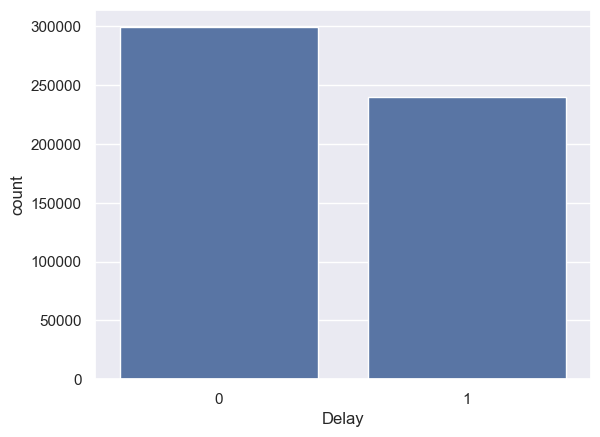

In [49]:
sns.countplot(x='Delay', data=df)

<Axes: xlabel='Time', ylabel='Count'>

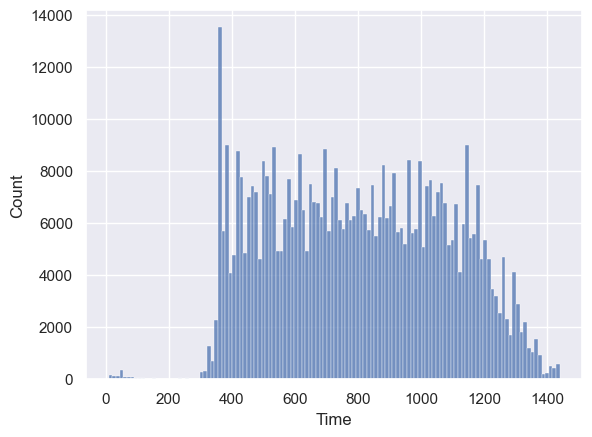

In [51]:
sns.histplot(df['Time'])

<Axes: xlabel='Length', ylabel='Count'>

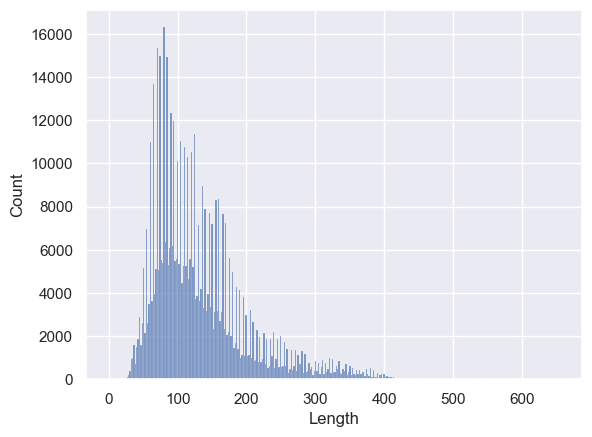

In [53]:
sns.histplot(df['Length'])

In [55]:
df['Length_by_hours'] = df['Length'] / 60
df['Time_by_hour'] = df['Time'] / 60

In [57]:
df.drop(columns=['Length', 'Time'], inplace=True)

<Axes: xlabel='Time_by_hour', ylabel='Count'>

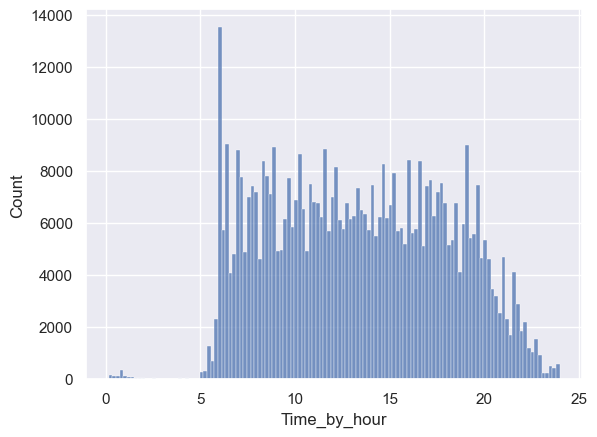

In [59]:
sns.histplot(df['Time_by_hour'])

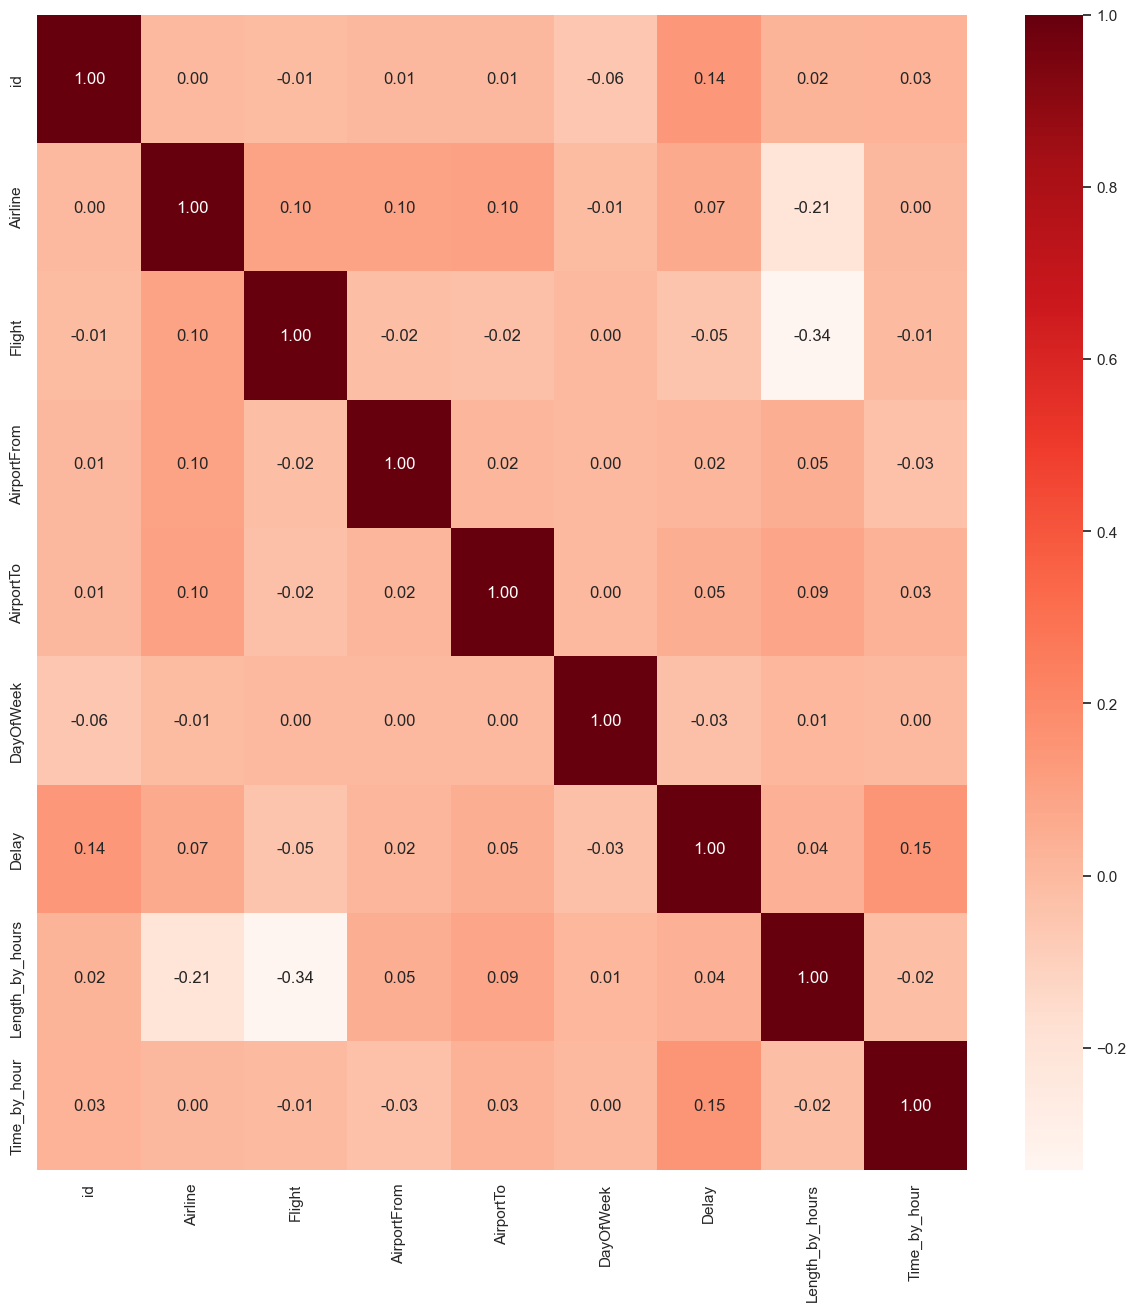

In [61]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [63]:
# separating data and Labels
X = df.drop(columns='Delay', axis=1)
Y = df['Delay']
print(X)
print(Y)

            id  Airline  Flight  AirportFrom  AirportTo  DayOfWeek  \
0            1        4     269          253        135          3   
1            2       14    1558          217         60          3   
2            3        1    2400          154         80          3   
3            4        1    2466          253         80          3   
4            5        2     108           14        252          3   
...        ...      ...     ...          ...        ...        ...   
539378  539379        4     178          203        264          5   
539379  539380        8     398          252         16          5   
539380  539381        8     609          253        184          5   
539381  539382       13      78          128        253          5   
539382  539383       14    1442          154        216          5   

        Length_by_hours  Time_by_hour  
0              3.416667      0.250000  
1              3.700000      0.250000  
2              2.750000      0.333333  

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(539383, 8) (431506, 8) (107877, 8)


In [67]:
print(X_train)
print(Y_train)

            id  Airline  Flight  AirportFrom  AirportTo  DayOfWeek  \
131753  131754       12    6289          227        153          3   
178735  178736        8     135           16        277          6   
290423  290424        1    1693          173         80          5   
104165  104166        5    2956          243        148          2   
325078  325079       13     465          277         79          7   
...        ...      ...     ...          ...        ...        ...   
370333  370334       14    1419          216        154          3   
18738    18739       15     250          104        173          4   
502164  502165       11    6545           22         85          3   
387912  387913       12    6981           79         67          4   
95238    95239       16    5987          208         20          1   

        Length_by_hours  Time_by_hour  
131753         1.000000     15.733333  
178735         1.500000     10.166667  
290423         2.916667     17.333333  

In [69]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier . fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print(classification_report(Y_test, y_pred))

Accuracy: 0.6927055813565449
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     59824
           1       0.68      0.60      0.63     48053

    accuracy                           0.69    107877
   macro avg       0.69      0.68      0.68    107877
weighted avg       0.69      0.69      0.69    107877

